# 第10回演習「サポートベクタマシンによる分類」の続き


この演習では、決定境界周辺のマージンを意識した分類方法を習得します。<br /><br />
グレイの背景のプログラムは上から順に、1つずつ実行していきましょう。<br />
途中のどこかを飛ばすと、意図と違う挙動になります。<hr />

## 5) まずここを実行しておきましょう

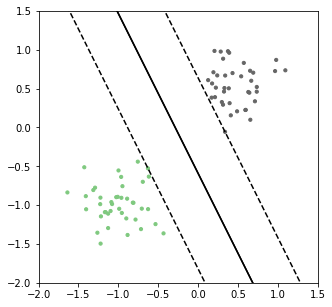

In [2]:
import sys
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

plt.figure(figsize=(5,5))

# 2値分類における、2つの中心点
中心点の配列=[(-1,-1),(0.5,0.5)]
# データセット作成
座標の配列X,ラベルy=make_blobs(n_samples=100,n_features=2,centers=中心点の配列,
                       cluster_std=0.25,random_state=0)
# データセットを学習データ(座標)、未知データ(座標)、学習データ(ラベル)、未知データ(ラベル)に分割
学習データのX,テストデータのX,学習データのラベルy,テストデータのラベルy=train_test_split(座標の配列X,
                                                         ラベルy,test_size=0.2,random_state=4)
# SVMで学習
線形SVM=SVC(kernel='linear',C=sys.maxsize) # 誤分類には厳しく
線形SVM.fit(学習データのX,学習データのラベルy) # 学習完了
# 決定境界を引く
係数 = 線形SVM.coef_[0] # coef[0]はXとYの係数
傾き = -係数[0] / 係数[1] # これで傾きを計算
Xの描画点 = np.linspace(-5, 5, 50)
Yの描画点 = 傾き * Xの描画点 - (線形SVM.intercept_[0]) / 係数[1] # intercept_ は切片に使う
plt.plot(Xの描画点, Yの描画点,linestyle='solid',color='k')
# マージンの座標を計算
マージン = 1/np.sqrt(np.sum(線形SVM.coef_**2))
マージン描画点のY_1 = Yの描画点 - np.sqrt(1+傾き**2) * マージン
マージン描画点のY_2 = Yの描画点 + np.sqrt(1+傾き**2) * マージン
# マージンを描画
plt.plot(Xの描画点, Yの描画点,linestyle='solid',color='k')
plt.plot(Xの描画点, マージン描画点のY_1, linestyle='dashed',color='k')
plt.plot(Xの描画点, マージン描画点のY_2, linestyle='dashed',color='k')
# 学習データを散布図に
plt.scatter(学習データのX[:,0],学習データのX[:,1],c=学習データのラベルy,marker="o",s=10,cmap=cm.Accent)
# 未知データはまだ表示しない
#plt.scatter(テストデータのX[:,0],テストデータのX[:,1],c=テストデータのラベルy,cmap=cm.seismic,marker="o")

plt.xlim(-2, 1.5) # グラフの描画範囲
plt.ylim(-2, 1.5)
plt.show()

## 6) 図の中でサポートベクタを示す

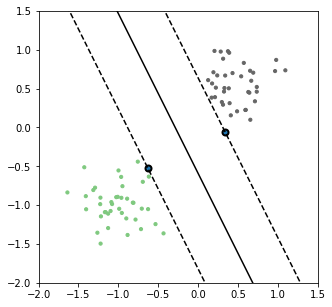

[[-0.62793695 -0.52602771]
 [ 0.3390954  -0.05585079]]


In [3]:
plt.figure(figsize=(5,5))

# 学習データを散布図に
plt.scatter(学習データのX[:,0],学習データのX[:,1],c=学習データのラベルy,marker="o",s=10,cmap=cm.Accent)
# 未知データはまだ表示しない
#plt.scatter(テストデータのX[:,0],テストデータのX[:,1],c=テストデータのラベルy,cmap=cm.seismic,marker="o")

plt.plot(Xの描画点, Yの描画点,linestyle='solid',color='k')
plt.plot(Xの描画点, マージン描画点のY_1, linestyle='dashed',color='k')
plt.plot(Xの描画点, マージン描画点のY_2, linestyle='dashed',color='k')
plt.scatter(線形SVM.support_vectors_[:, 0],線形SVM.support_vectors_[:, 1], 
            linewidth=2,edgecolors='k');

plt.xlim(-2, 1.5) # グラフの描画範囲
plt.ylim(-2, 1.5)
plt.show()

print(線形SVM.support_vectors_) # サポートベクタの座標

## 7) 未知データも散布図へ

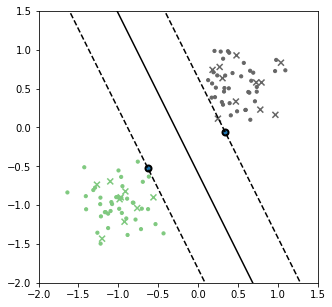

[1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0]
[1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0]
1.0


In [4]:
テストデータの分類結果=線形SVM.predict(テストデータのX) # テストデータへの分類結果としてラベルを得る

plt.figure(figsize=(5,5))
# 学習データを散布図に
plt.scatter(学習データのX[:,0],学習データのX[:,1],c=学習データのラベルy,marker="o",s=10,cmap=cm.Accent)
# 未知データも散布図に
plt.scatter(テストデータのX[:,0],テストデータのX[:,1],c=テストデータの分類結果,cmap=cm.Accent,marker="x")

# 決定境界、マージン
plt.plot(Xの描画点, Yの描画点,linestyle='solid',color='k')
plt.plot(Xの描画点, マージン描画点のY_1, linestyle='dashed',color='k')
plt.plot(Xの描画点, マージン描画点のY_2, linestyle='dashed',color='k')
plt.scatter(線形SVM.support_vectors_[:, 0],線形SVM.support_vectors_[:, 1], 
            linewidth=2,edgecolors='k');

plt.xlim(-2, 1.5) # グラフの描画範囲
plt.ylim(-2, 1.5)
plt.show()

print(テストデータの分類結果)
print(テストデータのラベルy)
print(accuracy_score(テストデータのラベルy,テストデータの分類結果)) # 精度

## 8) ノイズの影響を受けてみる

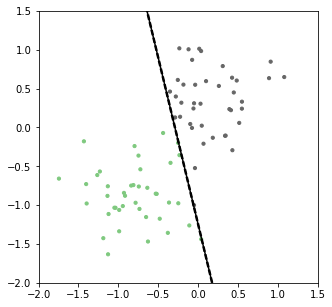

[1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0]
[1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0]
1.0


In [5]:
# 2値分類における、2つの中心点 (前のプログラムより2集団を近くした)
中心点の配列=[(-0.8,-0.9),(0.2,0.3)]

# 中心点が変わったので、データセットは再作成
座標の配列X,ラベルy=make_blobs(n_samples=100,n_features=2,centers=中心点の配列,cluster_std=0.37,random_state=0)

# テストデータとの分割も、やり直し
学習データのX,テストデータのX,学習データのラベルy,テストデータのラベルy=train_test_split(座標の配列X,
                                                         ラベルy,test_size=0.2,random_state=4)

############################### ↓意地悪なノイズデータを学習データに加える
学習データのX=np.vstack((学習データのX, [-0.05,-1]))
学習データのラベルy=np.append(学習データのラベルy,1)
############################### ↑意地悪なノイズデータを学習データに加えた

# 改めて学習を、やり直し
線形SVM=SVC(kernel='linear',C=sys.maxsize)
線形SVM.fit(学習データのX,学習データのラベルy) # 学習
テストデータの分類結果=線形SVM.predict(テストデータのX) # テストデータへの分類結果としてラベルを得る

# 決定境界も、計算し直し
係数 = 線形SVM.coef_[0] # coef[0]はXとYの係数
傾き = -係数[0] / 係数[1] # これで傾きを計算
Xの描画点 = np.linspace(-5, 5)
Yの描画点 = 傾き * Xの描画点 - (線形SVM.intercept_[0]) / 係数[1] # intercept_ は切片(誤差)

# マージンも、計算し直し
マージン = 1/np.sqrt(np.sum(線形SVM.coef_**2))
マージン描画点のY_1 = Yの描画点 - np.sqrt(1+傾き**2) * マージン
マージン描画点のY_2 = Yの描画点 + np.sqrt(1+傾き**2) * マージン

plt.figure(figsize=(5,5))
# 学習データを散布図に
plt.scatter(学習データのX[:,0],学習データのX[:,1],c=学習データのラベルy,marker="o",s=10,cmap=cm.Accent)
# 未知データも散布図に
#plt.scatter(テストデータのX[:,0],テストデータのX[:,1],c=テストデータの分類結果,cmap=cm.Accent,marker="x")

# 決定境界、マージン
plt.plot(Xの描画点, Yの描画点,linestyle='solid',color='k')
plt.plot(Xの描画点, マージン描画点のY_1, linestyle='dashed',color='k')
plt.plot(Xの描画点, マージン描画点のY_2, linestyle='dashed',color='k')

plt.xlim(-2, 1.5) # グラフの描画範囲
plt.ylim(-2, 1.5)
plt.show()

print(テストデータの分類結果)
print(テストデータのラベルy)
print(accuracy_score(テストデータのラベルy,テストデータの分類結果)) # 精度

## 9) ソフトマージンを使う

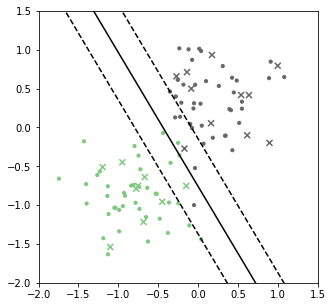

[1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0]
[1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0]
1.0


In [7]:
# ペナルティCを小さくして、学習し直し
線形SVM=SVC(kernel='linear',C=5) # ペナルティCを小さくする
線形SVM.fit(学習データのX,学習データのラベルy) # 学習
テストデータの分類結果=線形SVM.predict(テストデータのX) # テストデータへの分類結果としてラベルを得る

# 決定境界も、計算し直し
係数 = 線形SVM.coef_[0] # coef[0]はXとYの係数
傾き = -係数[0] / 係数[1] # これで傾きを計算
Xの描画点 = np.linspace(-5, 5)
Yの描画点 = 傾き * Xの描画点 - (線形SVM.intercept_[0]) / 係数[1] # intercept_ は切片(誤差)

# マージンも、計算し直し
マージン = 1/np.sqrt(np.sum(線形SVM.coef_**2))
マージン描画点のY_1 = Yの描画点 - np.sqrt(1+傾き**2) * マージン
マージン描画点のY_2 = Yの描画点 + np.sqrt(1+傾き**2) * マージン

plt.figure(figsize=(5,5))
# 学習データ
plt.scatter(学習データのX[:,0],学習データのX[:,1],c=学習データのラベルy,marker="o",s=10,cmap=cm.Accent)
# 未知データ
plt.scatter(テストデータのX[:,0],テストデータのX[:,1],c=テストデータの分類結果,cmap=cm.Accent,marker="x")

# 決定境界、マージン
plt.plot(Xの描画点, Yの描画点,linestyle='solid',color='k')
plt.plot(Xの描画点, マージン描画点のY_1, linestyle='dashed',color='k')
plt.plot(Xの描画点, マージン描画点のY_2, linestyle='dashed',color='k')

plt.xlim(-2, 1.5) # グラフの描画範囲
plt.ylim(-2, 1.5)
plt.show()

print(テストデータの分類結果)
print(テストデータのラベルy)
print(accuracy_score(テストデータのラベルy,テストデータの分類結果)) # 精度

## 小出しの任意課題(その3) 

<span style="background-color:#FFFF99">上のプログラムでペナルティのパラメタCを変更し、<br />
決定境界やマージン、予測精度がどう変わるかを観察しましょう。</span>
<hr />

## 10) カーネル法

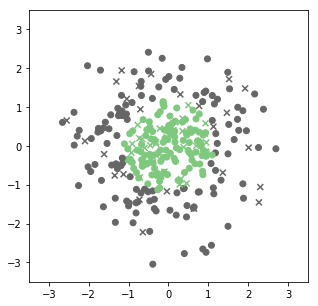

0.9833333333333333


In [8]:
# カーネル法
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import accuracy_score

座標の配列X,ラベルy=make_gaussian_quantiles(n_features=2,n_classes=2,n_samples=300,random_state=0)
学習データのX,テストデータのX,学習データのラベルy,テストデータのラベルy=train_test_split(座標の配列X,
                                                         ラベルy,test_size=0.2,random_state=0)

非線形SVM=SVC(kernel='rbf') # ガウシアンカーネル
非線形SVM.fit(学習データのX,学習データのラベルy)
テストデータの分類結果=非線形SVM.predict(テストデータのX)

plt.figure(figsize=(5,5))
plt.scatter(学習データのX[:,0],学習データのX[:,1],c=学習データのラベルy,cmap=cm.Accent,marker="o")
plt.scatter(テストデータのX[:,0],テストデータのX[:,1],c=テストデータの分類結果,cmap=cm.Accent,marker="x")
plt.xlim(-3.5, 3.5) # グラフの描画範囲
plt.ylim(-3.5, 3.5)
plt.show()

print(accuracy_score(テストデータのラベルy,テストデータの分類結果)) # 精度

## 小出しの任意課題(その4) 
<span style="background-color:#FFFF99">
ここまでのプログラムでは make_blobs や make_gaussian_quantiles でデータセットを生成しました。<br />
この他のデータセット生成方法(make_circles や make_moons 等)の使い方を調べ、図示までを行ってみましょう。<br />
学習・分類は必要ありません。
</span>


第10回第4章の演習はここまでです。お疲れさまでした。


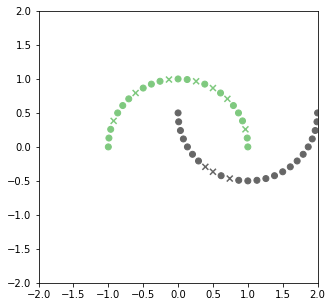

1.0


In [23]:
from sklearn.datasets import make_circles, make_moons

# 座標の配列X,ラベルy=make_circles(n_samples=100,random_state=0)
座標の配列X,ラベルy=make_moons(n_samples=50,random_state=0)
学習データのX,テストデータのX,学習データのラベルy,テストデータのラベルy=train_test_split(座標の配列X,
                                                         ラベルy,test_size=0.2,random_state=0)

非線形SVM=SVC(kernel='rbf') # ガウシアンカーネル
非線形SVM.fit(学習データのX,学習データのラベルy)
テストデータの分類結果=非線形SVM.predict(テストデータのX)

plt.figure(figsize=(5,5))
plt.scatter(学習データのX[:,0],学習データのX[:,1],c=学習データのラベルy,cmap=cm.Accent,marker="o")
plt.scatter(テストデータのX[:,0],テストデータのX[:,1],c=テストデータの分類結果,cmap=cm.Accent,marker="x")
plt.xlim(-2, 2) # グラフの描画範囲
plt.ylim(-2, 2)
plt.show()

print(accuracy_score(テストデータのラベルy,テストデータの分類結果)) # 精度